In [1]:
# imports

# standard import of pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [3]:
# getting dataframes

%store -r final_merge

### Order Prep Time = Days needed between order_date & ready_to_be_shipped

### No corrections made for weekends

In [5]:
final_merge.sample(2)

,order_id,order_date,state,region,ship_mode,ready_to_ship_date,pickup_date,arrival_scan_date
4651,CA-2019-130050,2019-07-16,Texas,Central,Standard Processing,NaT,2019-07-19,NaT
4900,US-2017-109162,2017-06-08,Tennessee,South,Standard Class,NaT,NaT,NaT


In [9]:
# Create new data frame
order_prep_time = final_merge.copy()

## keep only necessary columns
# new_df = old_df.filter(items=['col1', 'col2']).copy()
order_prep_time = order_prep_time.filter(items=["order_date", "ready_to_ship_date"]).copy()
order_prep_time.sample(1)

,order_date,ready_to_ship_date
3611,2018-09-05,NaT


In [11]:
order_prep_time.size

10020

In [13]:
# show me no. of cells that ARE NULL
order_prep_time['order_date'].isnull().sum()

0

In [14]:
# show me no. of cells that ARE NULL
order_prep_time['ready_to_ship_date'].isnull().sum()

4806

In [12]:
# show me no. of cells that are NOT NULL
order_prep_time['ready_to_ship_date'].notnull().sum()

204

In [15]:
# Drop rows if there are null values in column arrival scan date
order_prep_time.dropna(subset=['ready_to_ship_date'], inplace=True)
order_prep_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 8 to 5003
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_date          204 non-null    datetime64[ns]
 1   ready_to_ship_date  204 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.8 KB


In [21]:
# Create new column to display the calculated order prep time
order_prep_time["order_prep_time"] = order_prep_time["ready_to_ship_date"] - order_prep_time["order_date"]
order_prep_time.head(1)

,order_date,ready_to_ship_date,order_prep_time,order_prep_time_i
8,2020-11-23,2020-11-30,7 days,7


In [22]:
# Create new column for Days in INT format in case we need this for calculating
order_prep_time["order_prep_time_i"] = order_prep_time["order_prep_time"].dt.days
order_prep_time.head(1)

,order_date,ready_to_ship_date,order_prep_time,order_prep_time_i
8,2020-11-23,2020-11-30,7 days,7


In [23]:
## Want to calculate what day of week the order was made on, and shipped on - to see later if there are correlations

# Day of order
order_prep_time["ordered_day"] = order_prep_time["order_date"].dt.day_name()

# Day of arrival
order_prep_time["ready_ship_day"] = order_prep_time["ready_to_ship_date"].dt.day_name()
order_prep_time.tail(3)

,order_date,ready_to_ship_date,order_prep_time,order_prep_time_i,ordered_day,ready_ship_day
4913,2020-11-20,2020-11-24,4 days,4,Friday,Tuesday
4997,2020-11-30,2020-12-03,3 days,3,Monday,Thursday
5003,2020-11-25,2020-11-30,5 days,5,Wednesday,Monday


In [25]:
%store order_prep_time

Stored 'order_prep_time' (DataFrame)


``` 
Order received (Day 1) - order processed in the warehouse and made ready to ship (normally 2 days) - order leaves warehouse in the truck the following day
```

### What is the average number of days it takes from order received and ready for shipping?

In [27]:
# Mean value = 4.18 days
order_prep_time.order_prep_time_i.mean()

4.176470588235294

In [29]:
# Describe the data
order_prep_time.order_prep_time_i.describe()

count   204.00
mean      4.18
std       1.97
min       0.00
25%       3.00
50%       4.00
75%       6.00
max       8.00
Name: order_prep_time_i, dtype: float64

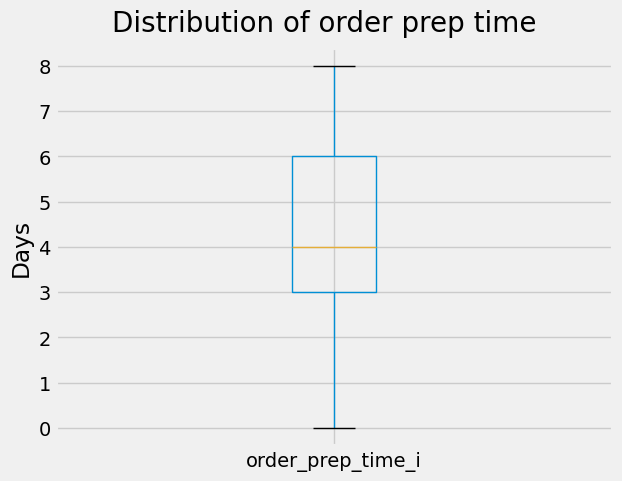

In [32]:
plt.suptitle('Distribution of order prep time', fontsize=20)
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
order_prep_time.boxplot(column='order_prep_time_i') # creates boxplot for order lead time
plt.ylabel('Days');

In [34]:
# What days do the customers receive their orders?
order_prep_time.order_prep_time_i.value_counts()

order_prep_time_i
5    44
4    39
6    37
2    24
3    20
7    18
0    16
1     4
8     2
Name: count, dtype: int64